In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [17]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

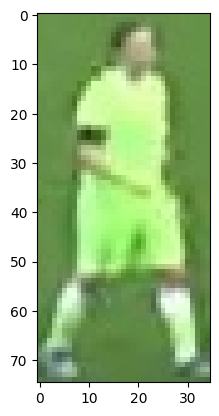

In [18]:
plt.imshow(image)
plt.show()

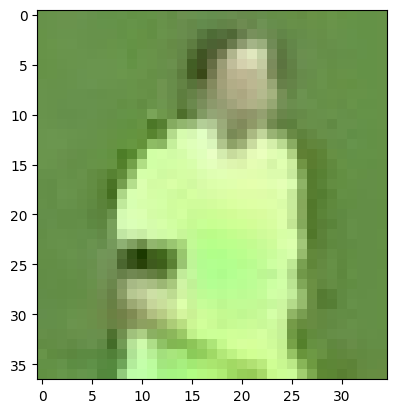

In [27]:
height = image.shape[0] // 2
top_half_image = image[:height, :, :]
plt.imshow(top_half_image)
plt.show()

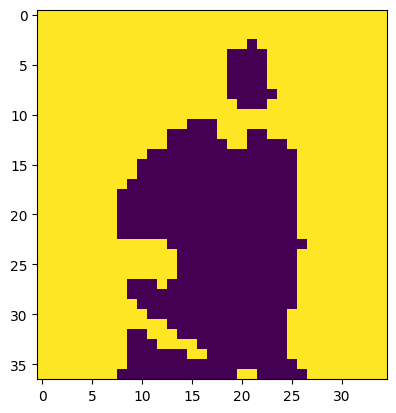

In [29]:
top_half_image_2d = top_half_image.reshape(-1, 3)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(top_half_image_2d)
labels = kmeans.labels_
clustered_image = labels.reshape(height, top_half_image.shape[1])
plt.imshow(clustered_image)
plt.show()

In [30]:
corner_clusters = [
    clustered_image[0, 0],
    clustered_image[0, -1],
    clustered_image[-1, 0],
    clustered_image[-1, -1],
]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [31]:
kmeans.cluster_centers_[1 - non_player_cluster]

array([198.49622166, 240.36020151, 152.78337531])